In [3]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib
from pathlib import Path

In [4]:
path_folder = 'TOP4040/'

In [5]:
class NPZLoader(Dataset):
    def __init__(self, path, transform=None, cur_iter = 7):
        self.path = path
        self.files = list(Path(path).glob('**/*.npz'))
        self.transform = transform
        self.cur_iter = cur_iter

    def __len__(self):
        return len(self.files)

    def __getitem__(self, item):
        numpy_array = np.load(self.files[item])['arr_0']
        target = numpy_array[-1]
        r,c = numpy_array[0].shape
        n_1_iter = numpy_array[self.cur_iter]
        n_iter = numpy_array[self.cur_iter-1]
        gradient = (n_1_iter - n_iter).reshape(1,r,c)
        sample = np.concatenate((n_1_iter.reshape(1,r,c),gradient)), target
        
        
#         torch_array = torch.from_numpy(numpy_array)
        if self.transform:
            sample = self.transform(sample)
        return sample

In [6]:
check = NPZLoader(path_folder,cur_iter = 5)

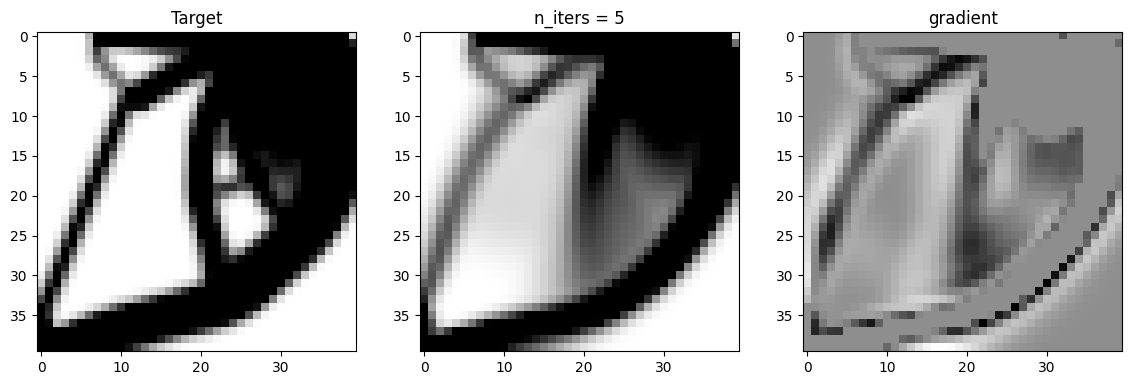

In [9]:
num = 2
plt.figure(figsize = (14,11))
plt.subplot(1,3,1)
plt.title(f'Target')
plt.imshow(check[num][1], cmap= 'binary')

plt.subplot(1,3,2)
plt.title(f'n_iters = {check.cur_iter}')
plt.imshow(check[num][0][0], cmap= 'binary')

plt.subplot(1,3,3)
plt.title(f'gradient')
plt.imshow(check[num][0][1], cmap= 'binary')

In [28]:
class ConvNet(nn.Module):
    
    def __init__(self):
        ...
        
    def forward(self,x):
        
        ...